## TAKE HOME TEST - DATA PREPARATION

> ### Objective: 
> - To demonstrate practical skills in data preprocessing by cleansing and preparing the data.
> 
> ### Dataset: 
> - The Adult dataset, available at [UCI Machine Learning Repository - Adult Dataset](https://archive.ics.uci.edu/dataset/2/adult). 
> - The dataset aims to predict whether an individual's income exceeds $50K/yr based on census data.

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
# Liblary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('data/adult_csv.csv')

In [3]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (48842, 15)


In [5]:
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object


In [6]:
print("Missing values of each column:\n", df.isna().sum())

Missing values of each column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64


In [7]:
# Show few rows of the dataset
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K
6,3,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,0,Jamaica,<=50K
7,3,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,>50K
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K
9,2,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,2,0,2,United-States,>50K


**Initial Observations:**
- Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
- There are no Float Datatypes in the dataset.
- Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
- We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with them.

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [8]:
# Mengganti tipe data kolom fnlwgt dan hoursperweek
df[['fnlwgt', 'hoursperweek']] = df[['fnlwgt', 'hoursperweek']].astype('float64')

In [9]:
df.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capitalgain         int64
capitalloss         int64
hoursperweek      float64
native-country     object
class              object
dtype: object

In [10]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2.0,United-States,<=50K
1,3,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0.0,United-States,<=50K
2,2,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2.0,United-States,<=50K
3,3,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2.0,United-States,<=50K
4,1,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2.0,Cuba,<=50K


### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [11]:
# Identify any columns that have missing values, you can also show the number and percentage of missing values.
print("Number of missing values in each column:\n", df.isna().sum())
print("\nPercentage of missing values in each column (decimal):\n", (df.isna().sum() / len(df)) * 100)
print("\nPercentage of missing values in each column:\n", (df.isnull().sum() / len(df) * 100).round(2).astype(str) + '%')

Number of missing values in each column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

Percentage of missing values in each column (decimal):
 age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capitalgain       0.000000
capitalloss       0.000000
hoursperweek      0.000000
native-country    1.754637
class             0.000000
dtype: float64

Percentage of missing values in each column:
 age                0.0%
workclass         5.73%
fnlwgt             0.0%
educ

**Handling Missing Values With Fillna**

Replacing missing values with 'Unknown' is a common approach used to handle cases like this, where we don't have sufficient information to replace the missing values with a more specific method.

In [12]:
# Handling missing values with fillna
df[['workclass', 'occupation', 'native-country']] = df[['workclass', 'occupation', 'native-country']].fillna('Unknown')

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

In [14]:
# few rows of the dataset after handling missing values
df[df.isin(['Unknown'])].dropna(how='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
27,NaN,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
61,NaN,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,NaN,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48800,NaN,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48812,NaN,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [15]:
df_num = df.select_dtypes(exclude = ['object']) 

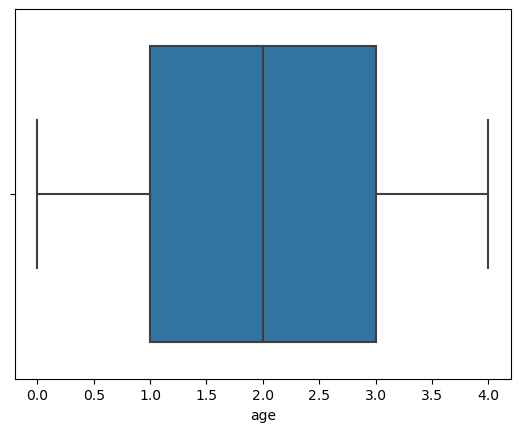

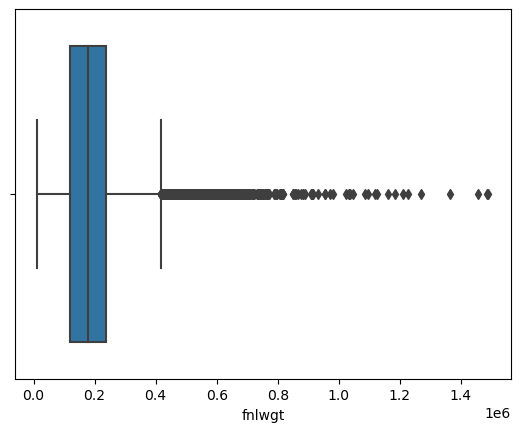

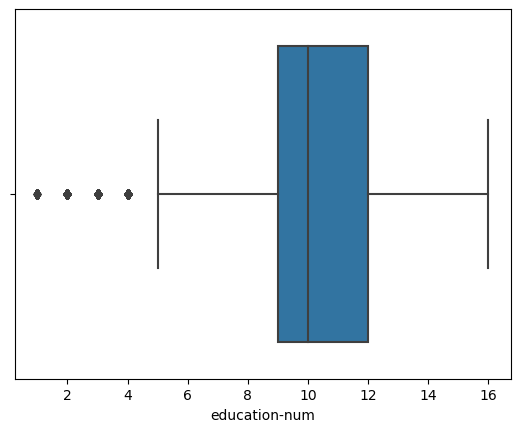

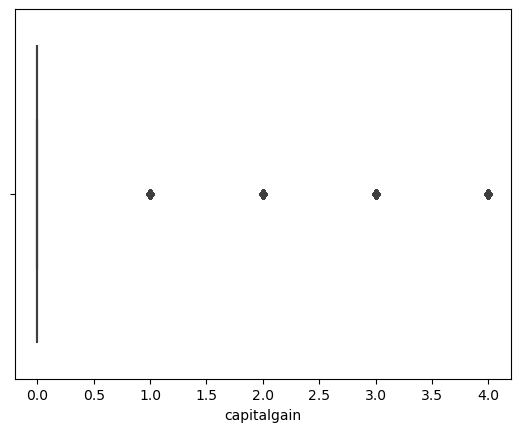

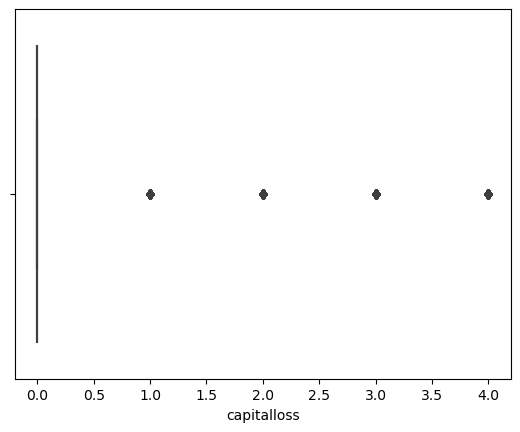

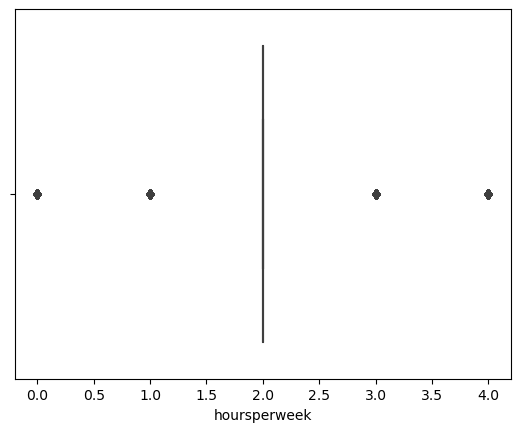

In [16]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [17]:
# Fungsi untuk mengidentifikasi outliers menggunakan metode IQR
def find_outliers_iqr(column):
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame()

# Mengidentifikasi kolom-kolom dengan outliers
columns_with_outliers = []
outliers_counts = {}

for column in df.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

# Strategi untuk menangani outliers: Menghapus baris yang mengandung outliers
for column in columns_with_outliers:
    outliers = find_outliers_iqr(column)
    df = df.drop(outliers.index)

In [18]:
# Menampilkan kolom-kolom dengan outliers dan jumlah outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:
fnlwgt: 1453 outliers
education-num: 1794 outliers
capitalgain: 4035 outliers
capitalloss: 2282 outliers
hoursperweek: 21033 outliers


In [19]:
# Menampilkan informasi setelah penanganan outliers
print("\nNumber of rows after handling outliers:", len(df))


Number of rows after handling outliers: 22700
